<a href="https://colab.research.google.com/github/Creator-Aaron/CISC484PAP/blob/main/Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up the og_df

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("ageutk_full.csv")

def df_range(df, min_val, max_val):
    return df[(min_val <= df.age) & (df.age <= max_val)]


og_df = df_range(data,0, 70)
print(og_df)




                                       files  age  gender
0      26_0_2_20170104023102422.jpg.chip.jpg   26       0
1      22_1_1_20170112233644761.jpg.chip.jpg   22       1
2      21_1_3_20170105003215901.jpg.chip.jpg   21       1
3      28_0_0_20170117180555824.jpg.chip.jpg   28       0
4      17_1_4_20170103222931966.jpg.chip.jpg   17       1
...                                      ...  ...     ...
23163  41_0_0_20170109012220690.jpg.chip.jpg   41       0
23164  42_0_0_20170117185738076.jpg.chip.jpg   42       0
23165   2_0_2_20161219221701671.jpg.chip.jpg    2       0
23166  65_1_0_20170110182002744.jpg.chip.jpg   65       1
23167  66_0_1_20170117195116702.jpg.chip.jpg   66       0

[22483 rows x 3 columns]


# Here I got a visualized distribution of ages in the original dataset

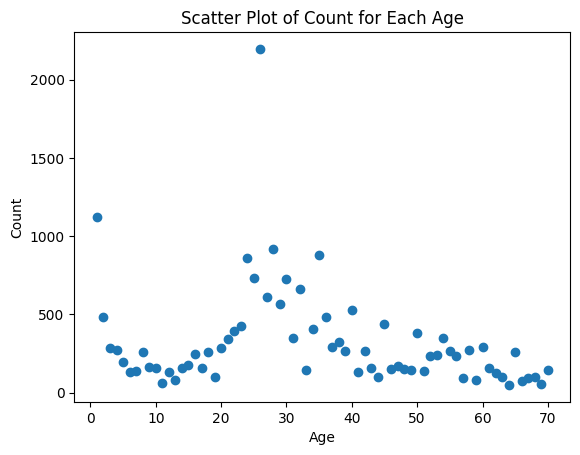

In [8]:
#Calculate the count of each instance and create scatter plt:
count_df = og_df.groupby('age').size().reset_index(name='Count')
#Add labels
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Scatter Plot of Count for Each Age')
plt.scatter(count_df['age'], count_df['Count'])
plt.show()

#it appears that the distribution can be improved see plot belo

# Balancing dataset to have an even amount of entries for each age. 50 entries each

In [9]:
# Get the minimum count
min_count = count_df['Count'].min()

# Print the result
print(f"The minimum count is: {min_count}")


The minimum count is: 50


In [22]:
#Create a new DataFrame with balanced instances for each category.
balanced_df = pd.DataFrame()

for age in count_df['age']:
    # Sample instances equal to the minimum count for each category this is random sampling
    sampled_instances = og_df[og_df['age'] == age].sample(n=min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, sampled_instances], ignore_index=True)


                                      files  age  gender
0      1_0_2_20161219211407518.jpg.chip.jpg    1       0
1      1_1_0_20161219155714349.jpg.chip.jpg    1       1
2      1_1_0_20161219205529388.jpg.chip.jpg    1       1
3      1_0_2_20161219203514252.jpg.chip.jpg    1       0
4      1_1_0_20170109190935139.jpg.chip.jpg    1       1
...                                     ...  ...     ...
3495  70_1_0_20170110143251046.jpg.chip.jpg   70       1
3496  70_0_1_20170117174954253.jpg.chip.jpg   70       0
3497  70_0_0_20170117173644159.jpg.chip.jpg   70       0
3498  70_1_0_20170120222024102.jpg.chip.jpg   70       1
3499  70_0_0_20170104213700973.jpg.chip.jpg   70       0

[3500 rows x 3 columns]


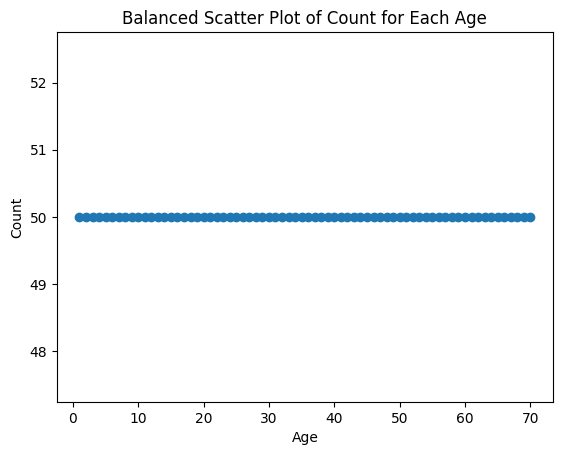

In [23]:
# Calculate the count of each instance in the balanced dataset
balanced_count_df = balanced_df.groupby('age').size().reset_index(name='Count')
print(balanced_df)
# Create scatter plot
plt.scatter(balanced_count_df['age'], balanced_count_df['Count'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Balanced Scatter Plot of Count for Each Age')

# Display the plot
plt.show()


# get Df of ages 0-35

In [26]:
# Create a modified DataFrame with instances where 'Age' is less than 35
u35_df = balanced_df[balanced_df['age'] < 35]

In [28]:
# Print the modified DataFrame for ages less than 35
print("Modified DataFrame:")
print(u35_df)


Modified DataFrame:
                                      files  age  gender
0      1_0_2_20161219211407518.jpg.chip.jpg    1       0
1      1_1_0_20161219155714349.jpg.chip.jpg    1       1
2      1_1_0_20161219205529388.jpg.chip.jpg    1       1
3      1_0_2_20161219203514252.jpg.chip.jpg    1       0
4      1_1_0_20170109190935139.jpg.chip.jpg    1       1
...                                     ...  ...     ...
1695  34_1_1_20170112213659687.jpg.chip.jpg   34       1
1696  34_0_3_20170119200717205.jpg.chip.jpg   34       0
1697  34_0_0_20170117132525481.jpg.chip.jpg   34       0
1698  34_0_0_20170117141513036.jpg.chip.jpg   34       0
1699  34_1_1_20170113000209880.jpg.chip.jpg   34       1

[1700 rows x 3 columns]


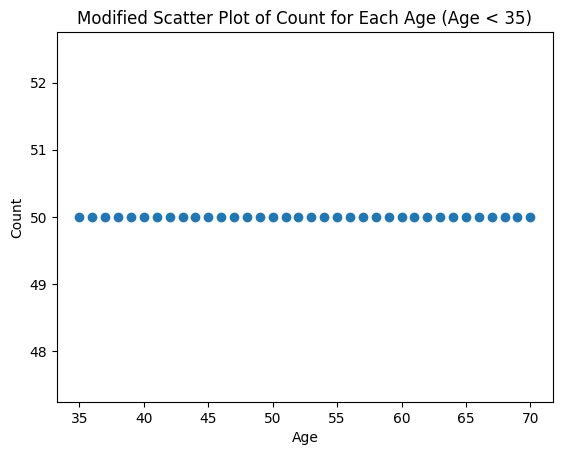

In [33]:
# Plot the scatter plot for the modified dataset
modified_count_u35_df = u35_df.groupby('age').size().reset_index(name='Count')
plt.scatter(modified_count_u35_df['age'], modified_count_u35_df['Count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Modified Scatter Plot of Count for Each Age (Age < 35)')
plt.show()

# get df of ages 35-70

In [31]:
# Create a modified DataFrame with instances where 'Age' is greater than or equal to 35
above_35_df = balanced_df[balanced_df['age'] >= 35]


In [32]:
# Print the modified DataFrame of ages above 35
print("Modified DataFrame:")
print(above_35_df)

Modified DataFrame:
                                      files  age  gender
1700  35_0_0_20170117192314819.jpg.chip.jpg   35       0
1701  35_0_3_20170117135015886.jpg.chip.jpg   35       0
1702  35_0_2_20170116173641544.jpg.chip.jpg   35       0
1703  35_1_3_20170117145058906.jpg.chip.jpg   35       1
1704  35_0_0_20170116193236930.jpg.chip.jpg   35       0
...                                     ...  ...     ...
3495  70_1_0_20170110143251046.jpg.chip.jpg   70       1
3496  70_0_1_20170117174954253.jpg.chip.jpg   70       0
3497  70_0_0_20170117173644159.jpg.chip.jpg   70       0
3498  70_1_0_20170120222024102.jpg.chip.jpg   70       1
3499  70_0_0_20170104213700973.jpg.chip.jpg   70       0

[1800 rows x 3 columns]


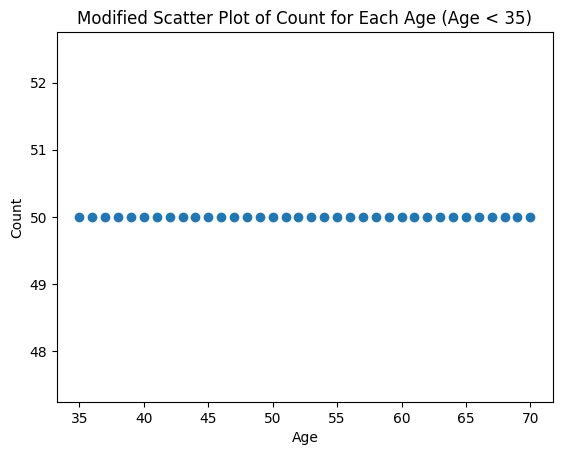

In [34]:
# Plot the scatter plot for the modified dataset for ages above 35
modified_count_above35_df = above_35_df.groupby('age').size().reset_index(name='Count')
plt.scatter(modified_count_above35_df['age'], modified_count_above35_df['Count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Modified Scatter Plot of Count for Each Age (Age < 35)')
plt.show()